In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
import numpy as np

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'BMJUA_ttf'

In [30]:
with open('../data/pickles/df_salesBasic.pkl', "rb") as file:
    df_salesBasic = pickle.load(file)

In [2]:
df_news = pd.read_csv('../data/wiggle.news.csv')

In [3]:
df_news = df_news.drop(columns=['_id','news_brand'])

In [4]:
# 결측치 처리
while True:
    nan_list = df_news.query('news_date.isna()').index

    for i in nan_list:
        try:
            df_news['news_date'].iloc[i] = df_news['news_date'].iloc[i+1]
        except:
            pass

    if len(nan_list) == 0:
        break

In [5]:
# 날짜 형식 변경
def to_datetime(get_list):
    change_list = list()
    for i in get_list:
        date = ''
        try:
            temp_list = i.split('. ')
            date += temp_list[0]
            date += '-'

            if len(temp_list[1]) == 1:
                date += '0'
                date += temp_list[1]
            else:
                date += temp_list[1]

            change_list.append(date)
        except:
            change_list.append(np.nan)

    return change_list

In [6]:
df_news['news_date'] = to_datetime(df_news['news_date'])

## 뉴스 전처리

In [10]:
# 영어, 한글만 선택
import re

def replace_text(text):
    text = text.replace('\\n',' ')
    text = re.sub(r'[^a-zA-Z가-힣\s]',' ',text)
    return text

In [12]:
df_news['newText'] = df_news['news_title'] + ' ' + df_news['news_contents']
df_news['newText'] = df_news['newText'].apply(replace_text)

### 체크 날짜 선정
- 2022-08 / 2022-12 / 2023-02 / 2023-07 / 2023-09 / 2023-12 / 2024-02

In [14]:
check_date = ['2022-08','2022-12','2023-02','2023-07','2023-09','2023-12','2024-02']

In [15]:
df_news

,news_title,news_date,news_contents,newText
0,[HOTEL] 샴페인이 그리운 가을,2021-09,"©그랜드 조선 부산\n샴페인이 그리운 가을, 그랜드 조선 부산\n그랜드 조선 부산이...",HOTEL 샴페인이 그리운 가을 그랜드 조선 부산 샴페인이 그리운 가을 그랜...
1,"헤어브러쉬 탱글티저·핸드크림 카밀, 올영세일로 만난다",2021-09,"기사내용 요약\n탱글티저와 카밀 각각 최대 40%, 37% 할인\n[서울=뉴시스] ...",헤어브러쉬 탱글티저 핸드크림 카밀 올영세일로 만난다 기사내용 요약 탱글티저와 카밀...
2,[위클리 스마트] 디자인 승부수 띄운 갤플립3..액세서리 인기 '불티',2021-09,"""액세서리로 개성 표현하려는 MZ세대에 선택권 제공하려 제휴"" (서울=연합뉴스) 정...",위클리 스마트 디자인 승부수 띄운 갤플립 액세서리 인기 불티 액세서리로...
3,갤플립3 '꾸미기 열풍'..액세서리 불티나,2021-09,[한국경제TV 장진아 기자]\n삼성전자의 새로운 폴더블폰 갤럭시Z플립3의 '꾸미기 ...,갤플립 꾸미기 열풍 액세서리 불티나 한국경제TV 장진아 기자 삼성전자의 ...
4,'꾸미는 재미' 액세서리로 왜 접어야 하는지 보여준 갤Z플립3,2021-09,[경향신문]\n삼성전자가 갤럭시Z플립3용으로 내놓은 액세서리 링(왼쪽 라벤더와 올리...,꾸미는 재미 액세서리로 왜 접어야 하는지 보여준 갤Z플립 경향신문 삼성전자...
...,...,...,...,...
775,"SK매직, '위글위글'과 협업···정수기 2종 출시",2024-04,톡톡 튀는 '위글위글' 디자인 적용... 개성 넘치는 주방 연출\n계약 고객 대상 ...,SK매직 위글위글 과 협업 정수기 종 출시 톡톡 튀는 위글위글 디자인 ...
776,"SK매직, 위글위글과 콜라보 정수기 2종 출시",2024-04,초소형 직수 정수기·미니 정수기 선봬 (지디넷코리아=신영빈 기자)SK매직이 라이프스...,SK매직 위글위글과 콜라보 정수기 종 출시 초소형 직수 정수기 미니 정수기 선봬...
777,"색다른 정수기 원한다면?…SK매직, 위글위글 콜라보 상품 2종 출시",2024-04,/사진제공=SK매직.\n\nSK매직이 라이프스타일 브랜드 위글위글과 콜라보해 △초소...,색다른 정수기 원한다면 SK매직 위글위글 콜라보 상품 종 출시 사진제공 SK...
778,"SK매직, 'MZ세대 인기' 위글위글과 콜라보…정수기 출시",2024-04,"초소형 직수 정수기, 미니 정수기 2종 출시\n콜라보 정수기 출시 기념해 이벤트도 ...",SK매직 MZ세대 인기 위글위글과 콜라보 정수기 출시 초소형 직수 정수기 미...


In [17]:
df_check = pd.DataFrame()

for i in check_date:
    df_check = pd.concat([df_check,df_news.query(f'news_date == "{i}"')])

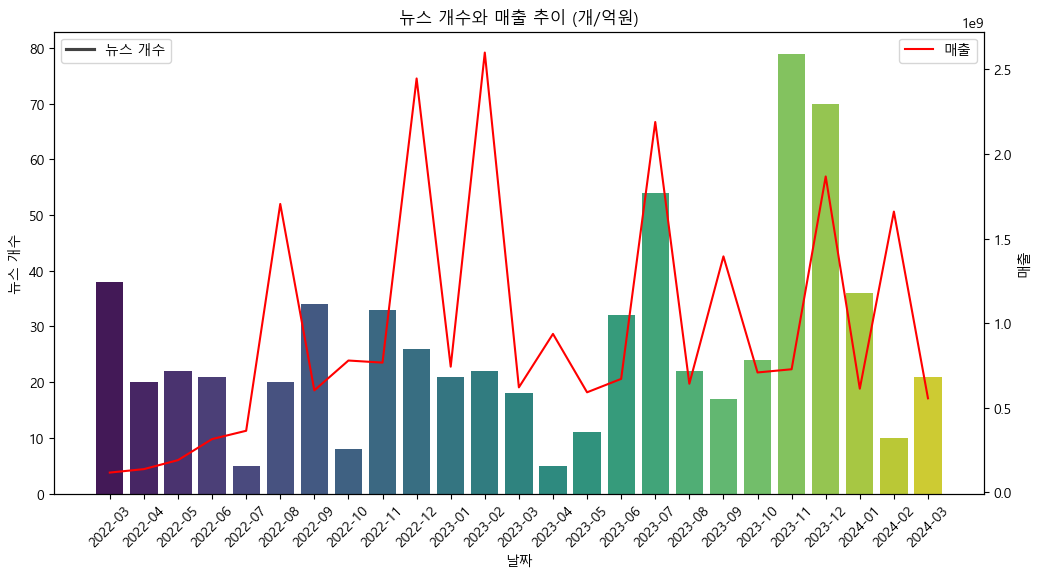

In [46]:
plt.figure(figsize=(12, 6))

# 뉴스 개수를 시간에 따라 추이를 보여주는 바플롯
news_counts = df_news.query('news_date >= "2022-03" & news_date <= "2024-03"').groupby('news_date').size()
sns.barplot(x=news_counts.index, y=news_counts, palette='viridis')

plt.title('뉴스 개수와 매출 추이 (개/억원)')
plt.xlabel('날짜')
plt.ylabel('뉴스 개수')
plt.xticks(rotation=45)
plt.legend(['뉴스 개수'], loc='upper left')

# 두 번째 축 설정
ax2 = plt.gca().twinx()
ax2.set_ylabel('매출')

# 매출 데이터를 시간에 따라 추이를 보여주는 라인 플롯
sales_data = df_salesBasic.query('referenceMonth >= "2022-03" & referenceMonth <= "2024-03"')
sns.lineplot(data=sales_data, x='referenceMonth', y='inCome', color='red', ax=ax2)

plt.legend(['매출'], loc='upper right')
plt.show()

## 체크 날짜 LDA

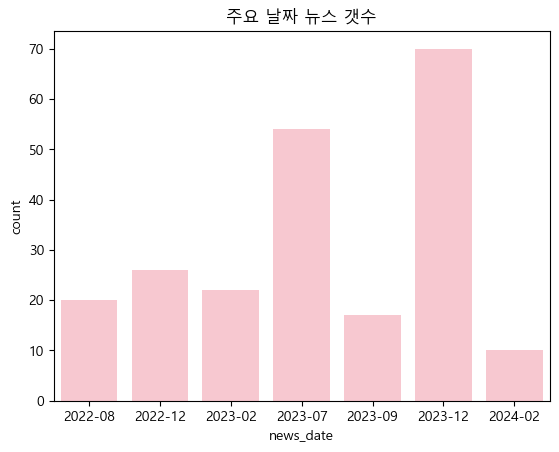

In [24]:
sns.countplot(data=df_check, x='news_date', color='pink')

plt.title('주요 날짜 뉴스 갯수')
plt.show()

### 토큰 / 벡터라이징

In [ ]:
from konlpy.tag import Okt
stopword = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','의','가','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

import re
import numpy as np


# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun","Alpha","Verb","Number"], stopword=stopword):

  get_list = []

  for word, tag in okt.pos(raw,norm=True,stem=True):
    if len(word) <= 1:
      word = '공란'

    if tag in pos and word not in stopword:
      get_list.append(word)
    else:
      get_list.append('공란')
    pass


  return get_list

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)